# U.S. Medical Insurance Costs
add project description - analysis of Cost & Risk Analysis
# The dataset is available at: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [137]:
#imports 
import pandas as pd
from matplotlib import pyplot as plt
# display floats with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)



**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

### Analysis Questions

- Compare average medical charges by region: Determine if healthcare costs vary significantly by geographic location.
- Analyze charges by BMI category: Group patients by BMI ranges (e.g., underweight, normal, overweight, obese) and compare their average charges.
- Explore the interaction effect between smoking and BMI on charges: Are smokers with higher BMI paying significantly more


In [134]:
### load the dataset into a pandas DataFrame
df = pd.read_csv('insurance.csv')

### Mean, median, standard deviation
yearly_cost_mean = df['charges'].mean() 
yearly_cost_median = df['charges'].median()
yearly_cost_sd = df['charges'].std() 

### Interquartile range (IQR): Q3 – Q1
q1, med, q3 = df['charges'].quantile([0.25, 0.5, 0.75])
yearly_cost_iqr = q3 - q1

### Region‐Level Aggregation
region_stats = (
    df.groupby('region')['charges']
      .agg(
        mean_cost='mean',
        sd_cost='std',
        count='size'
      )
      .assign(pct_share=lambda x: x['count'] / len(df) * 100)
      .reset_index()
)

### The Region with Highest Average Cost
region_with_max_cost = region_stats.loc[
    region_stats['mean_cost'].idxmax(),
    'region'
]

print(region_stats)

print(f"Average Yearly Cost: {yearly_cost_mean}")
print(f"The region with the highest average cost : {region_with_max_cost}")
print(f"The median of the insurance yearly cost{yearly_cost_median}")
print(f"The iqr for the insurance yearly cost  {yearly_cost_iqr}")


      region  mean_cost  sd_cost  count  pct_share
0  northeast   13406.38 11255.80    324      24.22
1  northwest   12417.58 11072.28    325      24.29
2  southeast   14735.41 13971.10    364      27.20
3  southwest   12346.94 11557.18    325      24.29
Average Yearly Cost: 13270.422265141257
The region with the highest average cost : southeast
The median of the insurance yearly cost9382.033
The iqr for the insurance yearly cost  11899.625365


## Visualizations
### Bar Chart: Average Cost by Region (±1 SD)

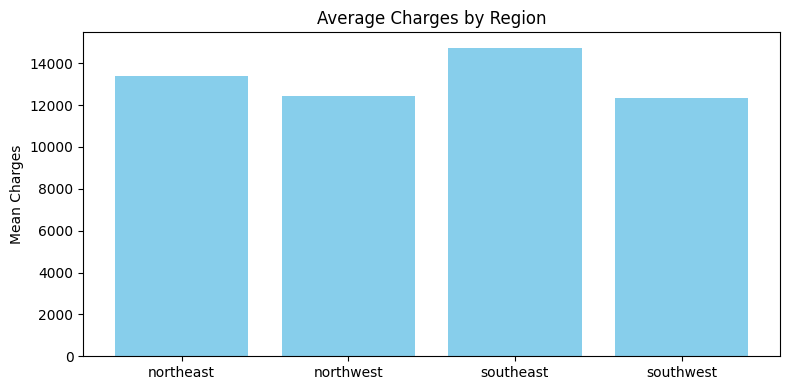

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(region_stats['region'], region_stats['mean_cost'], color='skyblue')
plt.ylabel('Mean Charges')
plt.title('Average Yearly Charges by Region')
plt.tight_layout()
plt.show()



### Distribution of All Charges (Histogram + Median & IQR)

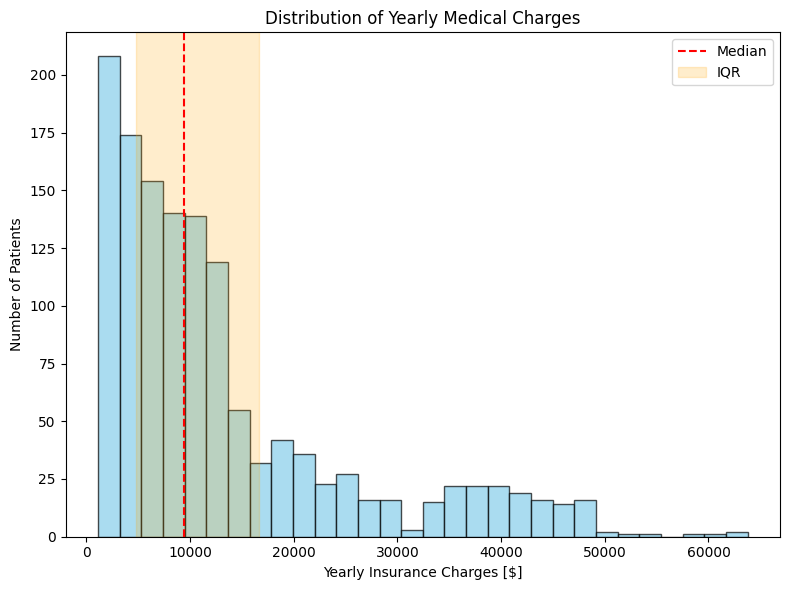

In [ ]:
plt.figure(figsize=(8, 6))

# Plot histogram of raw charges
plt.hist(
    df['charges'],
    bins=30,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Vertical line at overall median
plt.axvline(
    yearly_cost_median,
    color='red',
    linestyle='--',
    label='Median'
)

# Shaded band for IQR (Q1 to Q3)
plt.axvspan(
    q1, q3,
    color='orange',
    alpha=0.2,
    label='IQR'
)

plt.xlabel('Yearly Insurance Charges [$]')
plt.ylabel('Number of Patients')
plt.title('Distribution of Yearly Medical Charges')
plt.legend()
plt.tight_layout()
plt.show()




### Discussion 
- Objective: Evaluate whether geographic region influences annual insurance costs.

- Global Summary: Calculated mean, standard deviation, median, and IQR. The mean ($13.3 K) exceeded the median ($9.4 K) and the IQR was wide (~$11.9 K), revealing a pronounced right-skew and non-normal distribution—signaling factors beyond region at play.

- Regional Comparison: The Southeast had the highest average cost (~$14.7 K), but all regions’ means and standard deviations fell within a narrow band (±$1.2 K). This small inter-regional spread suggests geography contributes only marginally to cost differences.

- Distribution Shape: A histogram confirmed a long right tail of high-cost outliers, with most patients incurring charges below $15 K.

- Implication: Regional effects are minimal. 


## Charges By BMI

## charges vs Smoking and BMI

### Final Conclusion

- region does not affect cost
- Higher bmi raises cost
- smoking rasies cost with every BMI